[  5.85454597 -24.96744014]
[[9.92396724e-05            nan]
 [           nan 9.45202459e-03]]
8520863.333872989 906481.2458250963
-153000000.0 367367989.89569026


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


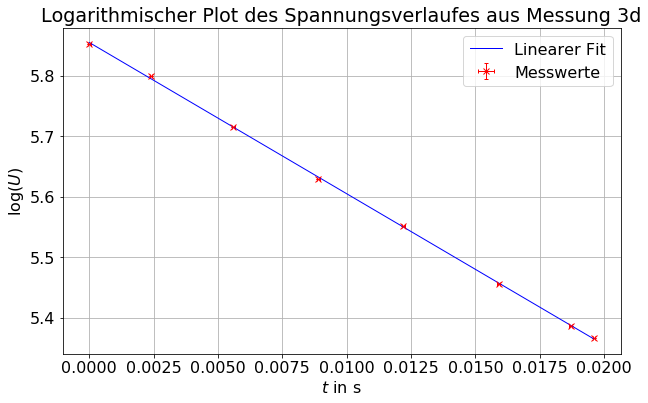

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import statistics as stat
import scipy.optimize 

t = (np.array([21,23.4,26.6,29.9,33.2,36.9,39.7,40.6])-21)/1000
sig_t = 0.05/1000
U = np.array([-347.7,-330.2,-303.4,-278.4,-257.6,-234.2,-218.4,-214.3])
sig_U = 0.05
sig_logU = -sig_U/U



def y(m,b,x):
    return m*x+b
popt, pcov = scipy.optimize.curve_fit(y,t,np.log(-U),sigma = sig_logU, p0=[0,0], absolute_sigma=True)
m = popt[1]
sig_m = np.sqrt(pcov[1][1])


plt.figure(figsize=(10,6))
plt.grid()
plt.title("Logarithmischer Plot des Spannungsverlaufes aus Messung 3d")
plt.errorbar(t,np.log(-U),xerr=sig_t,yerr = sig_logU,fmt = 'x',color = 'r',ecolor ='r',linewidth = 1,label = "Messwerte",capsize = 2)
plt.plot(t, popt[1]*t+popt[0],color = 'b',linewidth=1,label = "Linearer Fit")
plt.ylabel("$\log(U)$")
plt.xlabel("$t$ in s")
plt.savefig("Rx_2.png",dpi = 200)

plt.legend(loc = "upper right")

print(popt)
print(np.sqrt(pcov))


##Berechnung des Gesamtwiderstandes
m = -24.97
sig_m = 0.01
C = 4.7e-9
sig_C = 0.5e-9
R = -1/(m*C)
sig_R = np.sqrt(sig_m**2*1/(C**2*m**4)+sig_C**2*1/(C**4*m**2))
print(R,sig_R)

##Berechnung von Rx
R = 9e6
sig_R = 1e6
Roszi = 8.5e6
sig_Roszi = 0.7e6
Rx = R*Roszi/(Roszi-R)

a = (Roszi-R)**4
sig_Rx = np.sqrt(sig_Roszi**2*R**4/a+sig_R**2*Roszi**4/a)

print(Rx,sig_Rx)